In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import os

notebook_path = os.path.abspath('')
import sys
# Find the part of the path that contains 'commitFit'
commit_fit_path = None
for part in notebook_path.split(os.sep):
    print(part)
    if 'ensemble_commit' in part:
        commit_fit_path = notebook_path.split(part)[0] + part
        print(commit_fit_path)
        break

if commit_fit_path is None:
    raise ValueError("Path containing 'ensemble_commit' not found in notebook path.")


if commit_fit_path not in sys.path:
    sys.path.append(commit_fit_path)

import ensemble_model.preprocesser as preprocesser 
import ensemble_model.MoE_model_focal_loss as moe 
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer, DistilBertModel

# import whatthepatch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve,classification_report



root
ensemble_commit
/root/ensemble_commit


In [2]:
moe.BiLSTMStudent

ensemble_model.MoE_model_focal_loss.BiLSTMStudent

In [3]:
df = pd.read_csv(r'../datasets/dataset.csv', encoding='utf_8_sig')
df.dropna(inplace=True)
label2id={'negative':0,'positive':1}
df = df.replace({"label": label2id})
df

/tmp/ipykernel_8891/1052552286.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"label": label2id})


,Unnamed: 0,label,message,diff
0,0,0,Merge pull request #46 from rufferson/saslx-tl...,diff --git a/lib/DJabberd.pm b/lib/DJabberd.pm...
1,1,1,Fix leaks in kadmin server stubs [CVE-2015-863...,diff --git a/src/kadmin/server/server_stubs.c ...
2,2,1,Validate authorization request on approval\n\n...,diff --git a/spring-security-oauth2/src/main/j...
3,3,1,Release 2.72.4+171110,diff --git a/application/config/version.php b/...
4,4,0,Fixing compiler warnings.,diff --git a/src/main.c b/src/main.c\nindex 50...
...,...,...,...,...
10107,10107,0,les: remove useless protocol defines (#22115)\...,diff --git a/les/benchmark.go b/les/benchmark....
10108,10108,1,Merge pull request #2067 from realm/tg-swift-l...,diff --git a/CHANGELOG.md b/CHANGELOG.md\ninde...
10109,10109,0,[fix] 新規アカウント作成ページの翻訳を修正,diff --git a/app/locales/ja_JP/LC_MESSAGES/mes...
10110,10110,0,Merge branch 'hotfixes',diff --git a/CHANGELOG.txt b/CHANGELOG.txt\nin...


In [4]:
# df['command'] = df['diff'].apply(lambda x : extract_lines(find_longest_list([y.changes for y in whatthepatch.parse_patch(x)])))
# extracted_cols = df['diff'].str.extract(r'^diff --git (?P<source>[^\t\n]+) (?P<target>[^\t\n]+)')
# whatthepatch.apply_diff(diff, lao)

In [5]:
# len(df_dataset)

In [6]:
# df_dataset[0]

In [7]:
# Load BERT and CodeBERT models and tokenizers
bert_model = BertModel.from_pretrained('../models/bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('../models/bert-base-cased')

codebert_model = BertModel.from_pretrained('../models/bert-base-cased')
codebert_tokenizer = BertTokenizer.from_pretrained('../models/bert-base-cased')

Some weights of the model checkpoint at ../models/bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at ../models/bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight'

In [8]:
train_data, _ = train_test_split(df, train_size=0.35, random_state=42)
train_data, test_data = train_test_split(train_data, test_size=0.3, random_state=42)
# train_data = pd.read_csv('./datasets/PD_train.csv')
# test_data = pd.read_csv('./datasets/PD_test.csv')
# val_data = pd.read_csv('./datasets/PD_val.csv')



In [9]:
len(train_data)

2465

In [10]:
# codebert_model.config.hidden_size

In [11]:
len(test_data)

1057

In [12]:
test_data, val_data = train_test_split(test_data, train_size=0.5, random_state=42)

In [13]:
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

In [14]:
train_data['label'].value_counts()

label
0    1512
1     953
Name: count, dtype: int64

In [15]:
val_data

,index,Unnamed: 0,label,message,diff
0,5106,5106,0,Merge pull request #6 from daniel-beck-bot/htt...,diff --git a/pom.xml b/pom.xml\nindex 661ce51....
1,3322,3322,0,Fix Gitter badge,diff --git a/README.md b/README.md\nindex eff9...
2,3187,3187,1,Check for presence of crsf in admin scripts,diff --git a/src/Lua.cpp b/src/Lua.cpp\nindex ...
3,8592,8592,0,Fixed link errors,diff --git a/src/irisnet/CMakeLists.txt b/src/...
4,7272,7272,0,Fixed memory corruption introduced when creati...,diff --git a/Doxyfile b/Doxyfile\nindex f88538...
...,...,...,...,...,...
524,1500,1500,0,...,diff --git a/config/policy.xml b/config/policy...
525,1141,1141,0,SONY: added ImageCount3,diff --git a/dcraw/dcraw.c b/dcraw/dcraw.c\nin...
526,2921,2921,1,Fix bug #68942 (Use after free vulnerability i...,diff --git a/NEWS b/NEWS\nindex 0d93c47b02007....
527,8292,8292,0,先把 zbpimage 和 thumb 改成 thumbnail,diff --git a/zb_system/function/c_system_event...


In [16]:
val_data

,index,Unnamed: 0,label,message,diff
0,5106,5106,0,Merge pull request #6 from daniel-beck-bot/htt...,diff --git a/pom.xml b/pom.xml\nindex 661ce51....
1,3322,3322,0,Fix Gitter badge,diff --git a/README.md b/README.md\nindex eff9...
2,3187,3187,1,Check for presence of crsf in admin scripts,diff --git a/src/Lua.cpp b/src/Lua.cpp\nindex ...
3,8592,8592,0,Fixed link errors,diff --git a/src/irisnet/CMakeLists.txt b/src/...
4,7272,7272,0,Fixed memory corruption introduced when creati...,diff --git a/Doxyfile b/Doxyfile\nindex f88538...
...,...,...,...,...,...
524,1500,1500,0,...,diff --git a/config/policy.xml b/config/policy...
525,1141,1141,0,SONY: added ImageCount3,diff --git a/dcraw/dcraw.c b/dcraw/dcraw.c\nin...
526,2921,2921,1,Fix bug #68942 (Use after free vulnerability i...,diff --git a/NEWS b/NEWS\nindex 0d93c47b02007....
527,8292,8292,0,先把 zbpimage 和 thumb 改成 thumbnail,diff --git a/zb_system/function/c_system_event...


In [17]:


# Create Datasets and DataLoaders
train_dataset = preprocesser.SentencePairDataset(train_data, bert_tokenizer, codebert_tokenizer, message='message',command='diff',label='label')
val_dataset = preprocesser.SentencePairDataset(val_data, bert_tokenizer, codebert_tokenizer, message='message',command='diff',label='label')
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer, message='message',command='diff',label='label')

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)



# # Initialize the model
# model = em.CombinedModel(bert_model, codebert_model, bert_tokenizer, codebert_tokenizer)

# # Train the model
# model.trainer(train_loader, val_loader,num_epochs=10)
# for batch in train_loader:
#     print(batch)

In [18]:
base_model1 = moe.BaseModel(bert_model)
base_model2 = moe.BaseModel(codebert_model)

In [19]:
# Load BERT and CodeBERT models and tokenizers
bert_model = DistilBertModel.from_pretrained('/root/autodl-tmp/IPCK/model/distilbert')

codebert_model = DistilBertModel.from_pretrained('/root/autodl-tmp/IPCK/model/distilbert')

Some weights of the model checkpoint at /root/autodl-tmp/IPCK/model/distilbert were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at /root/autodl-tmp/IPCK/model/distilbert were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you

In [20]:
encoder_model1 = moe.EncoderModel(bert_model)
encoder_model2 = moe.EncoderModel(bert_model)

/root/miniconda3/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/10 Loss: 0.1584: 100%|██████████| 309/309 [06:04<00:00,  1.18s/batch]


=============================train========================
Validation Accuracy: 0.5898
Precision: 0.3479
Recall: 0.5898
F1-Score: 0.4376


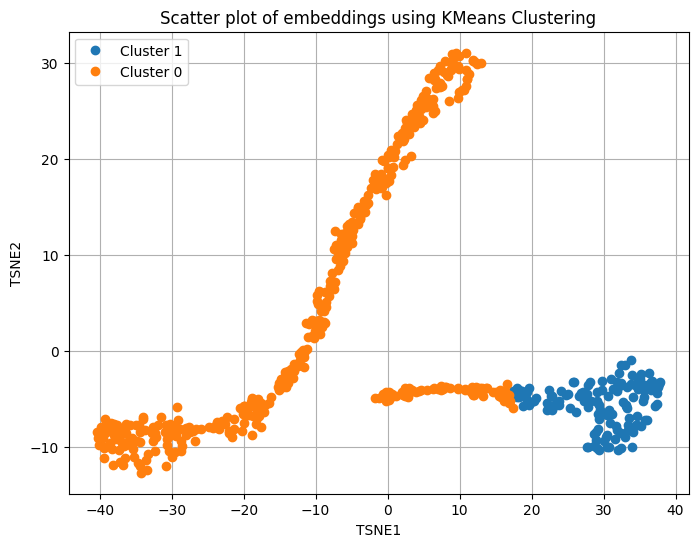

Epoch 2/10 Loss: 0.1289: 100%|██████████| 309/309 [06:00<00:00,  1.17s/batch]


=============================train========================
Validation Accuracy: 0.7146
Precision: 0.7713
Recall: 0.7146
F1-Score: 0.6755


<Figure size 640x480 with 0 Axes>

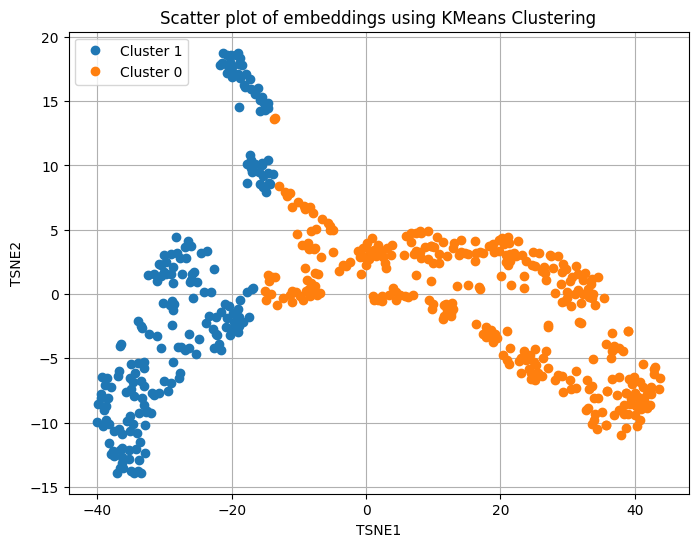

Epoch 3/10 Loss: 0.0959: 100%|██████████| 309/309 [05:58<00:00,  1.16s/batch]


=============================train========================
Validation Accuracy: 0.7845
Precision: 0.7978
Recall: 0.7845
F1-Score: 0.7862


<Figure size 640x480 with 0 Axes>

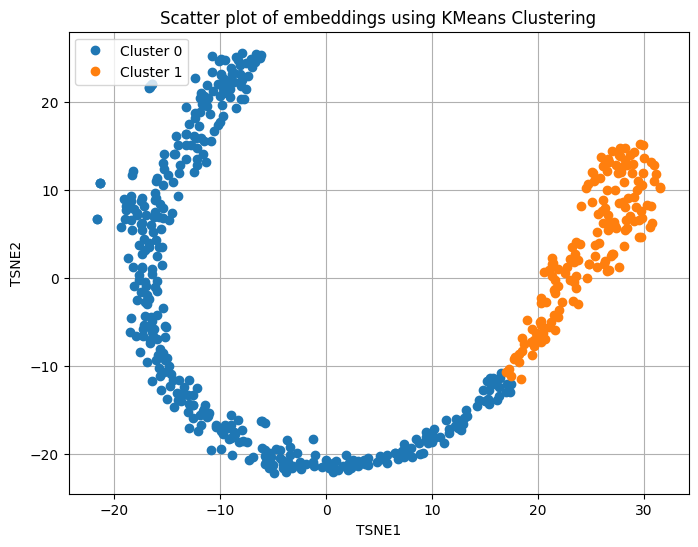

Epoch 4/10 Loss: 0.0584: 100%|██████████| 309/309 [05:30<00:00,  1.07s/batch]


=============================train========================
Validation Accuracy: 0.8223
Precision: 0.8318
Recall: 0.8223
F1-Score: 0.8236


<Figure size 640x480 with 0 Axes>

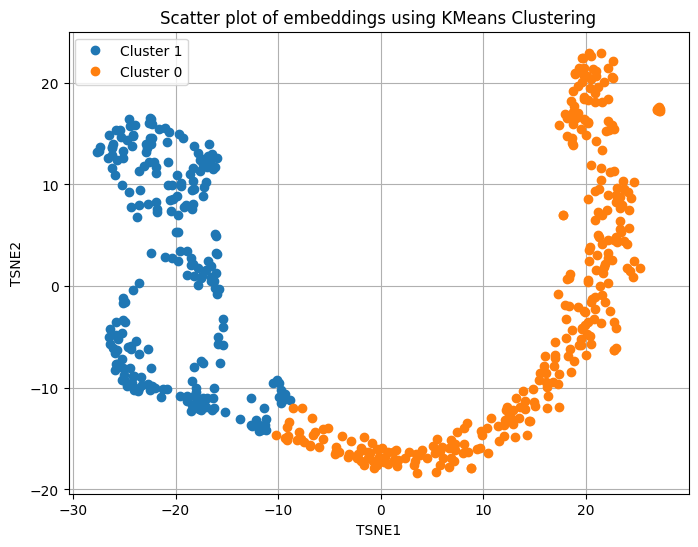

Epoch 5/10 Loss: 0.0360: 100%|██████████| 309/309 [05:34<00:00,  1.08s/batch]


=============================train========================
Validation Accuracy: 0.8129
Precision: 0.8211
Recall: 0.8129
F1-Score: 0.8142


<Figure size 640x480 with 0 Axes>

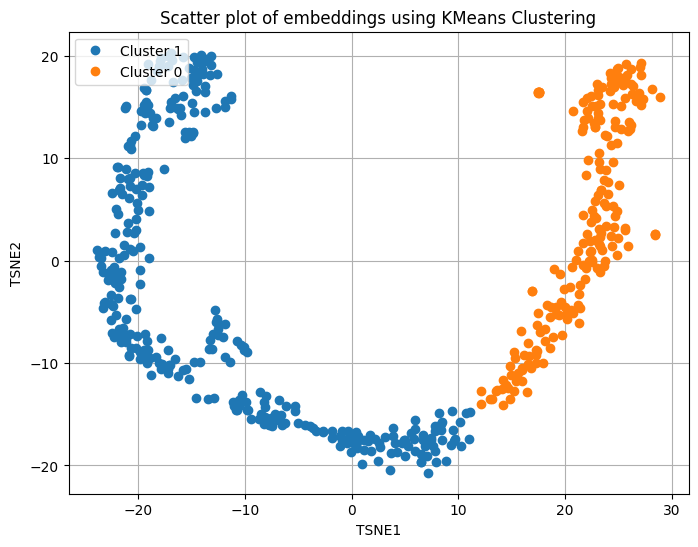

Epoch 6/10 Loss: 0.0184: 100%|██████████| 309/309 [05:31<00:00,  1.07s/batch]


=============================train========================
Validation Accuracy: 0.8185
Precision: 0.8198
Recall: 0.8185
F1-Score: 0.8190


<Figure size 640x480 with 0 Axes>

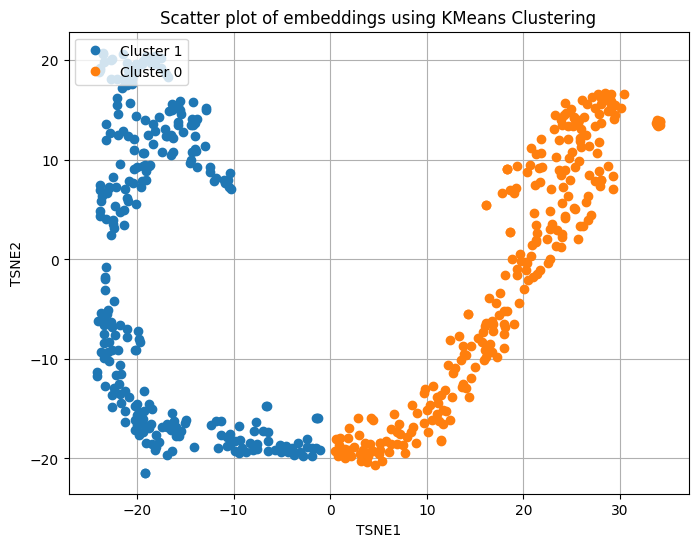

Epoch 7/10 Loss: 0.0160: 100%|██████████| 309/309 [05:36<00:00,  1.09s/batch]


=============================train========================
Validation Accuracy: 0.8166
Precision: 0.8158
Recall: 0.8166
F1-Score: 0.8158


<Figure size 640x480 with 0 Axes>

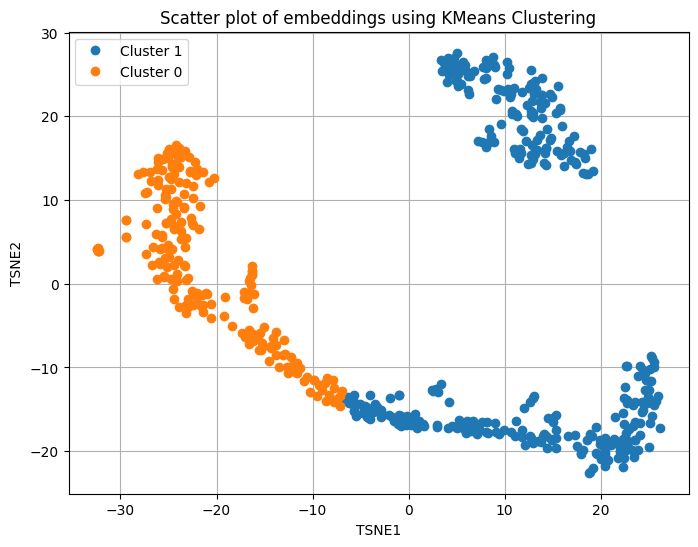

Epoch 8/10 Loss: 0.0117: 100%|██████████| 309/309 [05:26<00:00,  1.06s/batch]


=============================train========================
Validation Accuracy: 0.7977
Precision: 0.7973
Recall: 0.7977
F1-Score: 0.7975


<Figure size 640x480 with 0 Axes>

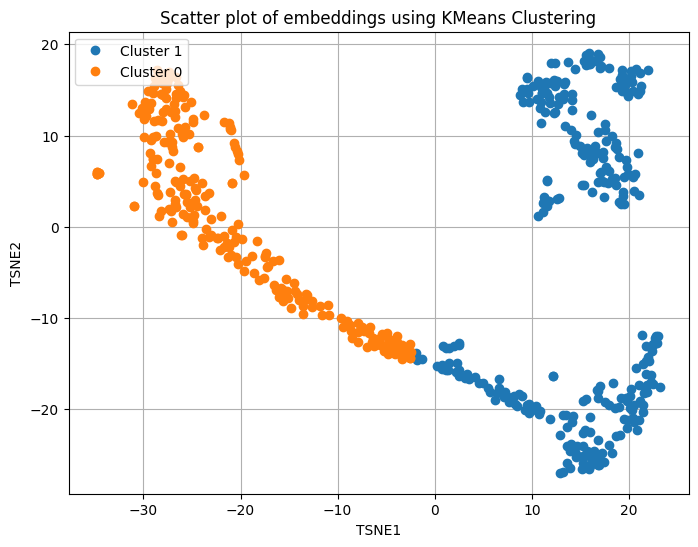

Epoch 9/10 Loss: 0.0055: 100%|██████████| 309/309 [05:19<00:00,  1.04s/batch]


=============================train========================
Validation Accuracy: 0.7902
Precision: 0.7928
Recall: 0.7902
F1-Score: 0.7910


<Figure size 640x480 with 0 Axes>

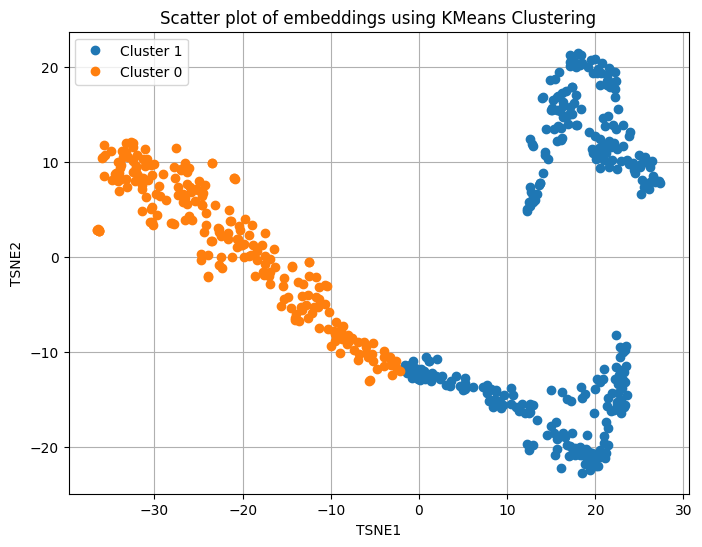

Epoch 10/10 Loss: 0.0061: 100%|██████████| 309/309 [05:26<00:00,  1.06s/batch]


=============================train========================
Validation Accuracy: 0.8261
Precision: 0.8257
Recall: 0.8261
F1-Score: 0.8258


<Figure size 640x480 with 0 Axes>

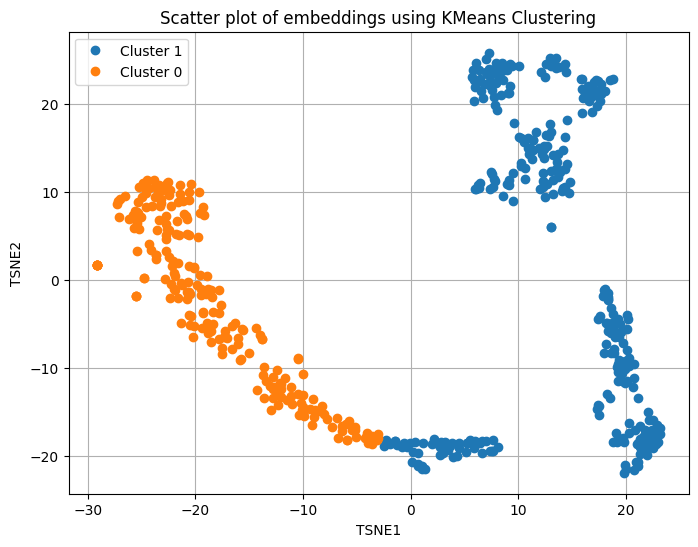

<Figure size 640x480 with 0 Axes>

In [21]:


# Create stacking model
moe_model = moe.MoEModel(base_model1, base_model2)
# Train the model
moe_model.trainer(train_loader, val_loader,num_epochs=10, patience=3)

In [22]:
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer,message='message',command='diff',label='label')
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [23]:
torch.save(moe_model, "focal_entire_bert_model_900repo.pth")

In [24]:
# moe_model = torch.load("entire_bert_model_900repo.pth")                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Validation Accuracy: 0.8769
Precision: 0.8761
Recall: 0.8769
F1-Score: 0.8761


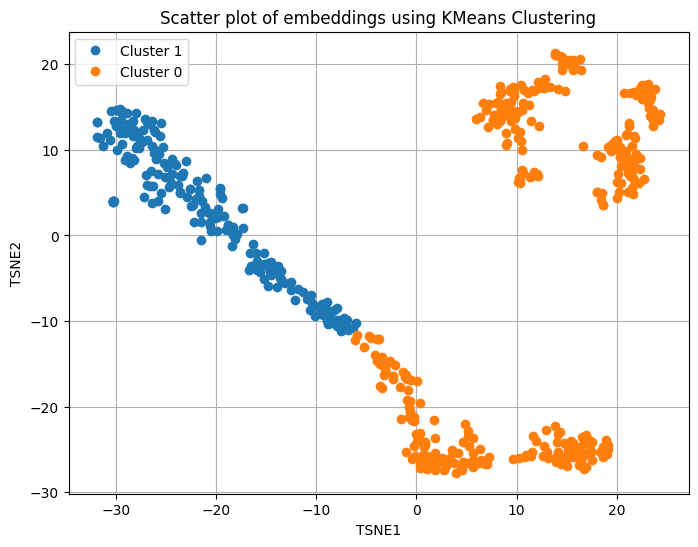

<Figure size 640x480 with 0 Axes>

In [25]:
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = moe_model.evaluate(test_loader)

In [26]:
print(classification_report(test_labels,test_predictions))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       335
           1       0.85      0.80      0.83       193

    accuracy                           0.88       528
   macro avg       0.87      0.86      0.87       528
weighted avg       0.88      0.88      0.88       528



In [27]:
test_acc

0.8768939393939394

In [28]:
#发送多种类型的邮件
from email.mime.multipart import MIMEMultipart
import smtplib

from email.mime.text import MIMEText
msg_from = '915803745@qq.com'  # 发送方邮箱
passwd = 'vcuosuurrgkfbdai'   #就是上面的授权码
 
# to= ['g.zhang@gotion.com', 'j.tong@gotion.com'] #接受方邮箱
to= ['j.tong@gotion.com'] #接受方邮箱
#设置邮件内容
#MIMEMultipart类可以放任何内容
msg = MIMEMultipart()
conntent="在线模型训练完毕"
#把内容加进去
msg.attach(MIMEText(conntent,'plain','utf-8'))
 
#设置邮件主题
msg['Subject']="在线模型训练完毕"
 
#发送方信息
msg['From']=msg_from
 
#开始发送
 
#通过SSL方式发送，服务器地址和端口
s = smtplib.SMTP_SSL("smtp.qq.com", 465)
# 登录邮箱
s.login(msg_from, passwd)
#开始发送
s.sendmail(msg_from,to,msg.as_string())
print("在线模型训练完毕")

在线模型训练完毕
